<!-- #region id="UqqA7Jph8T2o" -->
## Деревья решений

Продолжительность работы: - 4 часа.

Мягкий дедлайн (10 баллов): 5.12.2024

Жесткий дедлайн (5 баллов): 19.12.2024
<!-- #endregion -->

<!-- #region id="9iAZwRjCeAQO" -->
В данной домашней работе требуется реализовать разбиение элементов выборки в вершине дерева.
<!-- #endregion -->

<!-- #region id="7zl0dnOpd3xX" -->
$R$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки:

$$
Q(R, j, t) = \frac{|R_\ell|}{|R|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

$H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.
<!-- #endregion -->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import Iterable, List, Tuple

from sklearn.model_selection import train_test_split


In [2]:
# Загрузим набор данных по недвижимости в Бостоне
data = pd.read_csv('boston_house_prices.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<!-- #region id="b1KE7WIFKp51" -->
**Описание набора данных:**  

Boston Housing содержит данные, собранные Службой переписи населения США (англ. U.S Census Service), касающиеся недвижимости в районах Бостона. Набор данных состоит из 13 признаков и 506 строк и также предоставляет такую информацию, как уровень преступности (CRIM), ставка налога на недвижимость (TAX), возраст людей, которым принадлежит дом (AGE), соотношение числа учащихся и преподавателей в районе (PTRATIO) и другие. Данный набор данных используется для предсказания следующих целевых переменных: средняя стоимость дома (MEDV) и уровень закиси азота (NOX).

Описание набора данных можно посмотреть здесь: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
<!-- #endregion -->

In [3]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

X = pd.DataFrame(data, columns=feature_names, index=range(len(data)))
y = pd.DataFrame(data, columns=['MEDV'], index=range(len(data)))

X['target'] = y

In [4]:
X_train, X_test = train_test_split(X, test_size=0.25, random_state=13)

<!-- #region id="hirWI1Vw4Fle" -->
**Задание 1**:  
Реализуйте подсчет критерия ошибки. Для этого реализуйте функции для подсчета значения критерия информативности, а также для разбиения вершины.
<!-- #endregion -->

In [5]:
def H(R: np.array) -> float:
    """Вычислить критерий информативности для фиксированного набора объектов R.
    Предполагается, что последний столбец содержит целевое значение
    """
    # Используем дисперсию целевой переменной как критерий информативности
    if R.shape[0] == 0:
        return 0.0
    y = R[:, -1]
    return np.mean((y - np.mean(y)) ** 2)

def split_node(R: np.array, feature: str, t: float) -> Iterable[np.array]:
    """
    Разделить фиксированный набор объектов R по признаку feature с пороговым значением t
    """
    # Получаем индекс признака
    idx = feature_names.index(feature)
    # Формируем левые и правые подмножества
    left = R[R[:, idx] <= t]
    right = R[R[:, idx] > t]
    return left, right

def Q(R: np.array, feature: str, t: float) -> float:
    """
    Вычислить функционал качества для заданных параметров разделения
    """
    left, right = split_node(R, feature, t)
    n = R.shape[0]
    n_left = left.shape[0]
    n_right = right.shape[0]
    if n_left == 0 or n_right == 0:
        return np.inf
    return (n_left / n) * H(left) + (n_right / n) * H(right)

<!-- #region id="z5vMn7Yu4Flg" -->
**Задание 2**:
Переберите все возможные разбиения обучающей выборки по одному из признаков и постройте график критерия ошибки в зависимости от значения порога.
<!-- #endregion -->

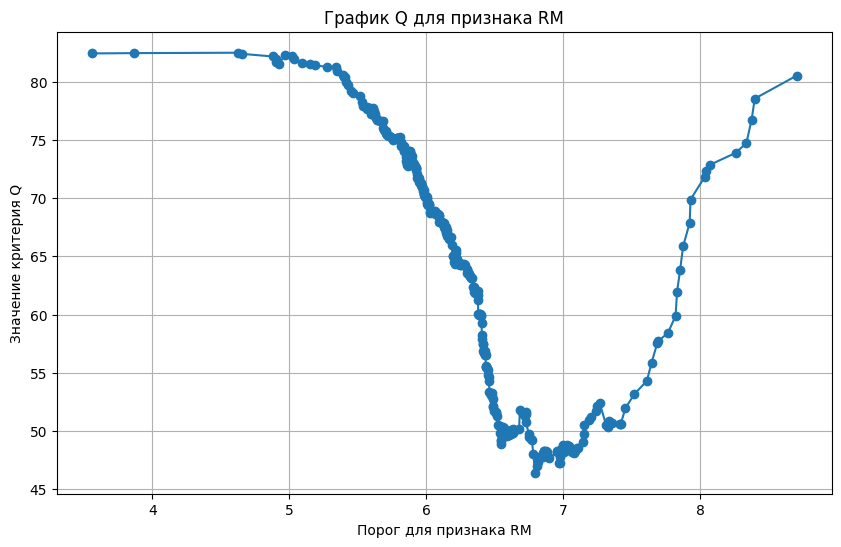

In [6]:
# Выбираем один признак, например 'RM', и строим график Q в зависимости от порога
R = X_train.values
feature = 'RM'
idx = feature_names.index(feature)
values = np.unique(R[:, idx])
qs = []
for t in values:
    q_val = Q(R, feature, t)
    qs.append(q_val)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(values, qs, marker='o')
plt.xlabel(f"Порог для признака {feature}")
plt.ylabel("Значение критерия Q")
plt.title(f"График Q для признака {feature}")
plt.grid(True)
plt.show()

<!-- #region id="cdNVqLH24Flj" -->
**Задание 3**:
Напишите функцию, находящую оптимальное разбиение данной вершины по данному признаку.
<!-- #endregion -->

In [7]:
def get_optimal_split(R: np.array, feature: str) -> Tuple[float, List[float]]:
    """
    Находит оптимальное разбиение для вершины R по признаку feature.
    Возвращает порог t, при котором Q минимально, и список значений Q для всех возможных порогов.
    """
    idx = feature_names.index(feature)
    values = np.unique(R[:, idx])
    best_t = None
    best_q = np.inf
    qs = []
    for t in values:
        q_val = Q(R, feature, t)
        qs.append(q_val)
        if q_val < best_q:
            best_q = q_val
            best_t = t
    return best_t, qs

<!-- #region id="WTwCYIgc4Fll" -->
**Задание 4**:  
Для первого разбиения найдите признак, показывающий наилучшее качество. Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога.
<!-- #endregion -->

In [8]:
# Находим лучший признак для первого разбиения
R = X_train.values
best_feature = None
best_t = None
best_q = np.inf
all_qs = {}
all_values = {}

for feature in feature_names:
    t, qs = get_optimal_split(R, feature)
    # Значение Q при пороге t
    q_at_t = Q(R, feature, t)
    all_qs[feature] = qs
    all_values[feature] = np.unique(R[:, feature_names.index(feature)])
    if q_at_t < best_q:
        best_q = q_at_t
        best_feature = feature
        best_t = t

best_feature, best_t, best_q

('RM', np.float64(6.794), np.float64(46.42614228882214))

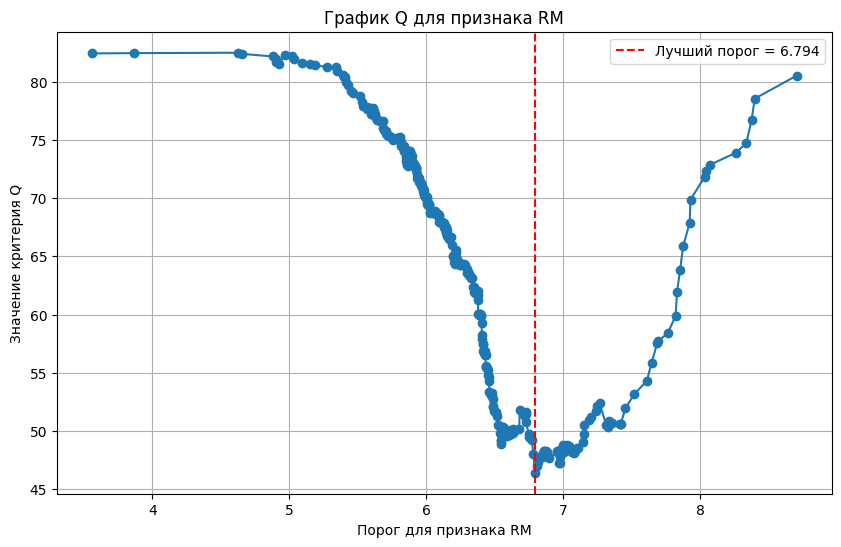

In [9]:
# Строим график Q для лучшего признака
values = all_values[best_feature]
qs = all_qs[best_feature]

plt.figure(figsize=(10, 6))
plt.plot(values, qs, marker='o')
plt.xlabel(f"Порог для признака {best_feature}")
plt.ylabel("Значение критерия Q")
plt.title(f"График Q для признака {best_feature}")
plt.axvline(best_t, color='red', linestyle='--', label=f"Лучший порог = {best_t}")
plt.legend()
plt.grid(True)
plt.show()

**Задание 5**:
Изобразите разбиение визуально. Для этого постройте диаграмму рассеяния целевой переменной в зависимости от значения входного признака. Далее изобразите вертикальную линию, соответствующую порогу разбиения.


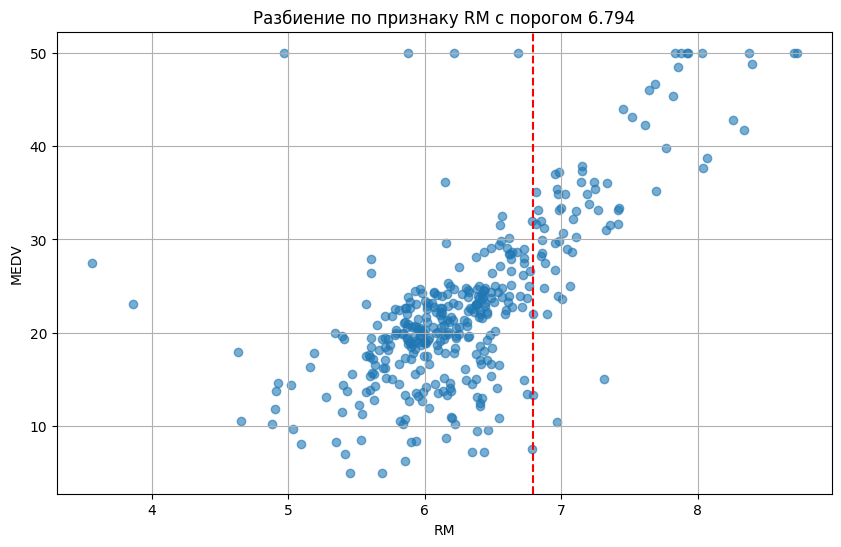

In [10]:
# Диаграмма рассеяния для лучшего признака
plt.figure(figsize=(10, 6))
plt.scatter(R[:, feature_names.index(best_feature)], R[:, -1], alpha=0.6)
plt.xlabel(best_feature)
plt.ylabel('MEDV')
plt.title(f"Разбиение по признаку {best_feature} с порогом {best_t}")
plt.axvline(best_t, color='red', linestyle='--')
plt.grid(True)
plt.show()

**Задание 5**:
Постройте модель обучения с помощью библиотеки модуля [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html).


In [11]:
from sklearn.tree import DecisionTreeRegressor

# Обучаем регрессор
regressor = DecisionTreeRegressor(random_state=13)
regressor.fit(X_train[feature_names], X_train['target'])

# Оцениваем качество на тестовой выборке
y_pred = regressor.predict(X_test[feature_names])
mse = np.mean((X_test['target'].values - y_pred) ** 2)
print(f"MSE на тестовой выборке: {mse:.4f}")

MSE на тестовой выборке: 29.4398
